# Disc & Washer Method – Solids of Revolution

---

## What is this?

This notebook demonstrates the **Disc Method** and **Washer Method** for finding the volume of solids of revolution.  
These are classic applications of definite integration in calculus.

---

## Core idea

- **Disc Method**:  
  When rotating a function around an axis, each thin slice perpendicular to the axis forms a disc.  
  The volume of each disc is:  
  $
  V_{\text{disc}} = \pi [R(x)]^2 \,dx
  $

- **Washer Method**:  
  When there’s an inner hole, you subtract the inner radius:  
  $
  V_{\text{washer}} = \pi \big( [R_{\text{outer}}(x)]^2 - [R_{\text{inner}}(x)]^2 \big) dx
  $

---

## What we’ll do here

1. Define example function(s) and interval $[a,b]$  
2. Use **`sympy`** for symbolic setup and verification  
3. Use **`numpy` / `scipy`** for numeric integration  
4. Use **`matplotlib`** to visualize:
   - Function curve
   - Axis of rotation
   - Shaded disc/washer slices
   - Full revolution outline

---

## Goal

> By the end, you’ll see exactly **how and why**  
> local area elements build up the 3D volume,  
> and how to verify symbolic, numeric, and graphical consistency.



In [13]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

**Disc**

In [15]:
x = np.linspace(0, 1, 50)
theta = np.linspace(0, 2*np.pi, 50)

X, Theta = np.meshgrid(x, theta)

R = np.sqrt(X)

In [16]:
Y = R * np.cos(Theta)
Z = R * np.sin(Theta)

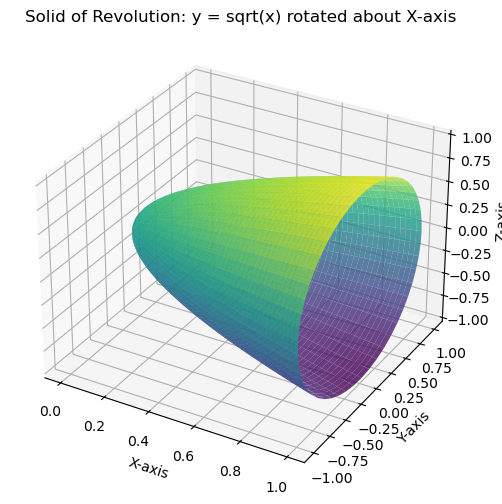

In [18]:
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')

ax.plot_surface(X, Y, Z, cmap='viridis', alpha=0.8)

ax.set_xlabel('X-axis')
ax.set_ylabel('Y-axis')
ax.set_zlabel('Z-axis')
ax.set_title('Solid of Revolution: y = sqrt(x) rotated about X-axis')

plt.show()

# Interpretation – Solid of Revolution (Disc Method)

## What does this figure represent?

This 3D visualization shows the solid of revolution created by rotating the function:  
$
f(x) = \sqrt{x}, \quad x \in [0, 1]
$  
about the x-axis.

---

## Geometric intuition

- The x-axis serves as the axis of rotation and also as the axis of integration, running from 0 to 1.  
- At each point $ x $, the radius of the cross-sectional disc is given by:  
$
R(x) = f(x) = \sqrt{x}
$
- Rotating this radius around the x-axis generates an infinite number of circular cross-sections (discs).

---

## Why does it form this shape?

- At $ x = 0 $, the radius is 0, forming the tip of the shape.
- As $ x $ increases toward 1, the radius $ \sqrt{x} $ gradually expands, creating the characteristic "horn" or "cone-like" shape.

---

## Connection to the integral

The volume of this solid is calculated by integrating the volume of infinitely thin discs:
$
V = \int_{0}^{1} \pi [\sqrt{x}]^2 dx = \int_{0}^{1} \pi x \, dx
$

Each thin disc element has a volume:
$
\text{Disc Volume} = \pi [R(x)]^2 dx
$

---

## Key takeaway

> This visualization clearly illustrates how the Disc Method transforms a 1D curve into a 3D solid.  
> It makes the integral's geometric meaning explicit: summing infinitely many small discs yields the total volume.


**Washer**

In [22]:
x = np.linspace(0, 1, 50)
theta = np.linspace(0, 2*np.pi, 50)

X, Theta = np.meshgrid(x, theta)

R_outer = np.sqrt(X)
R_inner = X / 2

In [23]:
Y_outer = R_outer * np.cos(Theta)
Z_outer = R_outer * np.sin(Theta)

Y_inner = R_inner * np.cos(Theta)
Z_inner = R_inner * np.sin(Theta)

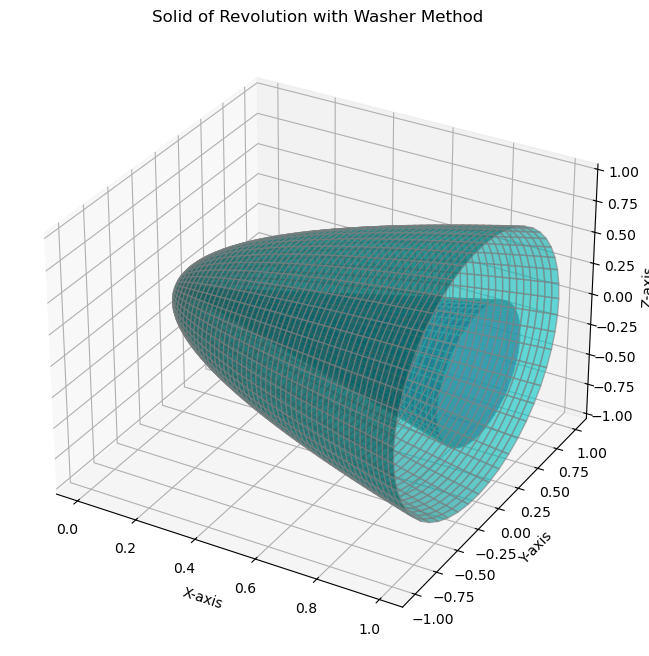

In [24]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

ax.plot_surface(X, Y_outer, Z_outer, color='cyan', alpha=0.6, edgecolor='grey', label='Outer')

ax.plot_surface(X, Y_inner, Z_inner, color='purple', alpha=0.6, edgecolor='grey', label='Inner')

ax.set_xlabel('X-axis')
ax.set_ylabel('Y-axis')
ax.set_zlabel('Z-axis')

ax.set_title('Solid of Revolution with Washer Method')

plt.show()

# Interpretation – Solid of Revolution (Washer Method)

## What does this figure represent?

This 3D visualization shows a **solid of revolution** generated by rotating a region bounded by two curves:
- **Outer radius:** $ R_{\text{outer}}(x) = \sqrt{x} $
- **Inner radius:** $ R_{\text{inner}}(x) = \frac{x}{2} $

rotated around the **x-axis** for $ x \in [0, 1] $.

---

## Geometric intuition

- The x-axis is the axis of rotation and integration.
- Each slice perpendicular to the x-axis forms a **washer**:  
  an outer disc with an inner hole.
- The cross-sectional area of each washer is:  
  $
  A(x) = \pi [R_{\text{outer}}(x)]^2 - \pi [R_{\text{inner}}(x)]^2.
  $

---

## Why does it form this shape?

- At $ x = 0 $, both radii are zero, so the shape starts as a point.
- As $ x $ increases to 1:
  - The outer radius grows like $ \sqrt{x} $ → expanding faster.
  - The inner radius grows like $ x/2 $ → expands more slowly.
- This creates a hollow horn or shell, like a tube that widens outward.

---

## Connection to the integral

The total volume is the sum of all washers:
$
V = \int_{0}^{1} \pi \Big( [\sqrt{x}]^2 - [\frac{x}{2}]^2 \Big) dx.
$

Each thin slice adds a tiny ring of volume:
$
\text{Washer Volume} = \pi \Big( R_{\text{outer}}^2 - R_{\text{inner}}^2 \Big) dx.
$

---

## Key takeaway

> The Washer Method generalizes the Disc Method by accounting for a hollow center.
> It shows how integrating outer and inner radii produces a solid with an internal void.
> This makes the geometry of the integral clear:  
> **"Outer volume minus inner volume = actual solid."**
